**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

*All the text in italics is instructions for filling the template - remove when writing the project report!*

# *Title* 

*Title should be concise and informative, describes the approach to solve the problem. Some good titles from previous years:*

*- Comparing extreme learning machines and naive bayes’ classifier in spam detection*

*- Using linear discriminant analysis in spam detection*

*Some not-so-good titles:*

*- Bayesian spam filtering with extras*

*- Two-component classifier for spam detection*

*- CS-E3210 Term Project, final report*




## Abstract

*Precise summary of the whole report, previews the contents and results. Must be a single paragraph between 100 and 200 words.*



## 1. Introduction

*Background, problem statement, motivation, many references, description of
contents. Introduces the reader to the topic and the broad context within which your
research/project fits*

*- What do you hope to learn from the project?*
*- What question is being addressed?*
*- Why is this task important? (motivation)*

*Keep it short (half to 1 page).*

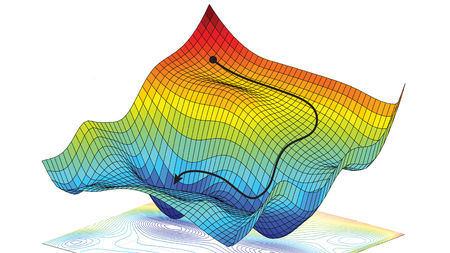

Machine learning (ML) is a field of artificial intelligence that uses statistical techniques to give computer systems the ability to "learn" (e.g., progressively improve performance on a specific task) from data without being explicitly programmed. (1)

During this course we learned the basic of ML. We began by understanding the elements of a ML problem (features, labels and hypothesis spaces) and then we measured how good a particular ML method performs through a loss function. Later we found out how to choose an optimal predictor based on minimizing the average loss (or Empirical Risk Minimization -ERM-), we applied Gradient Descent (GD) for solving the ERM problem in order to find good predictors incurred for labeled training data and we validated ML methods to detect and avoid poor performance (overfitting). Finally we studied some unsupervised ML methods such as clustering and feature learning. (2)

In this project we are designing a complete machine learning solution. We will work on the task of identifying the music genre of songs. Different machine learning methods are used to predict the music genre of songs through  preprocessed audio information.

The process that will be followed to carry out this project represents a first experience to deal with ML problems in the real life. This first approach will lay down the foundations to approach similar future challenges in an easier but probably a more elaborated way. Some questions that will be answered by the end of this project are the following: Is there an optimal ML method to solve a problem like the one we are dealing with in this project? If so, which method is it? Is the solution presented an ending to this problem or just the beginning to explore other methods and options to get a better one? No matter what answers we have at the end of this project, the work and effort invested in this project will be an excellent final "round" to apply all that we have learnt in this course.


## 2. Data analysis

*Briefly describe data (class distribution, dimensionality) and how will it affect
classification. Visualize the data. Don’t focus too much on the meaning of the features,
unless you want to.*

*- Include histograms showing class distribution.*

The data is divided into two datasets:
    . a training features dataset with 4363 rows (samples) and 264 columns (features)
    . a training labels dataset with 4363 rows and 2 columns, and
    . a test features dataset with 6544 rows (samples) and 264 columns (features)

The test labels will be predicted by this project.

The features vectors contain the next information:

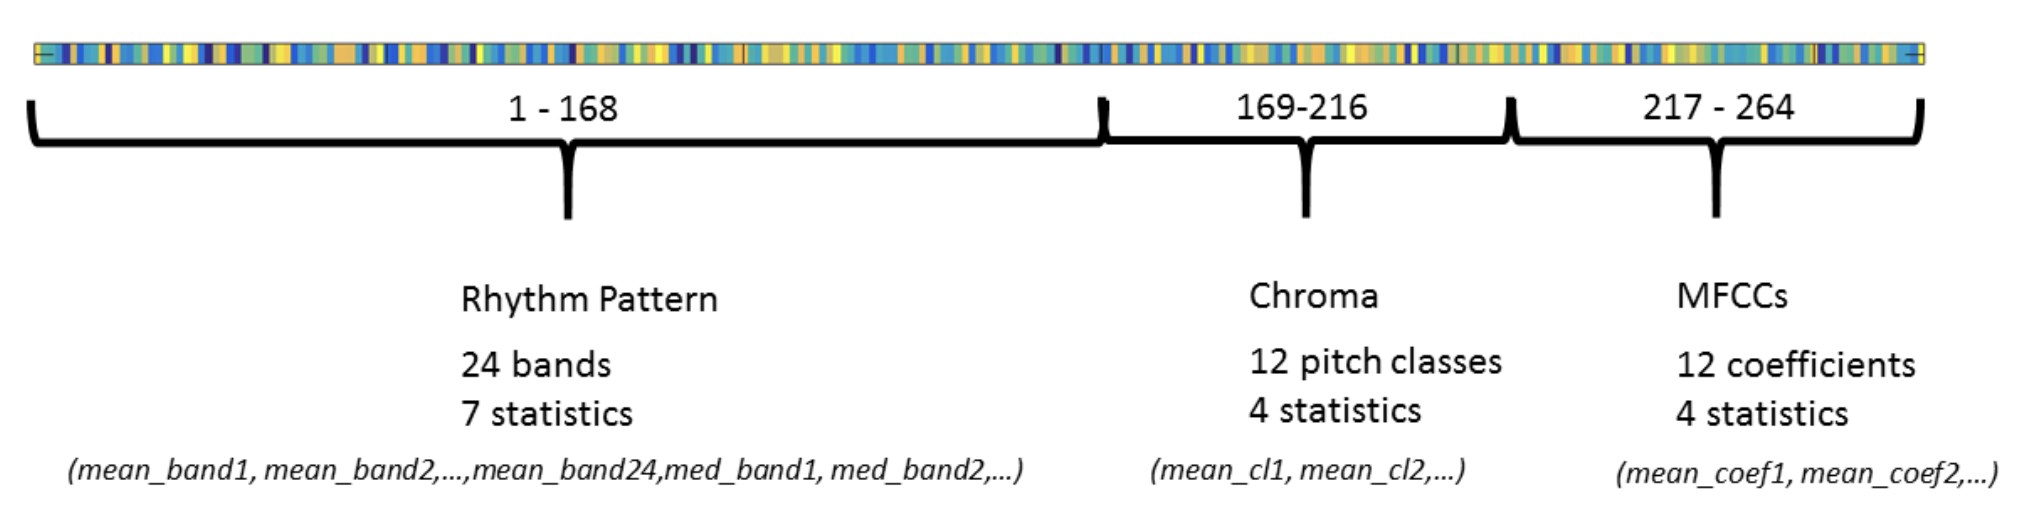
    
The training labels can be one of the following ten different classes:

    1 'Pop_Rock'
    2 'Electronic'
    3 'Rap'
    4 'Jazz'
    5 'Latin'
    6 'RnB'
    7 'International'
    8 'Country'
    9 'Reggae'
    10 'Blues'
  
 We identified incorrect parts of the data in the test features as long as it was an imbalanced multiclass dataset and then, in order to get more accurate predictions, we cleaned it:
    I.We found 4 columns (features) that had the same series of linearly depoendent and most probably incorrect values(1.000.000,00) and we removed them.
    II. Then, we standardized/scaled this data to mean 0 and variance 1 to fit the models to the data because there was a lot of varioance and different scale in the individual features.
   


Acording to the analysis of the principal components, we can state the following discoveries: the first four principal components have a variance of 40% ...


(All the different components are located in a small area/range of the principal 2 components and because here we can find the biggest variance with other principal combinations we will find evene smaller variance what it makes probble that there will not be very good linear predictors for the data that was given. This also tells us that it would be good to get more features with meaningful information because apparently many of these features that resulted do noit help us a lot to categorisze correctly.)

It is relevant here to mention that the first 2 principal components have 60 % of the variance of the total data.





### Cleaning the data


hkjlhjlk

Standardizing the data ince PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data before PCA analysis.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy.linalg import eig
from sklearn.preprocessing import MaxAbsScaler


In [33]:
# Load the data and cleanup
np.set_printoptions(threshold=50)

df_train_data=pd.read_csv("train_data.csv", header=None)
df_train_labels=pd.read_csv("train_labels.csv", header=None)
X_train=df_train_data.values
y_train=df_train_labels.values
y_train=np.ravel(y_train)

df_test_data=pd.read_csv("test_data.csv", header=None)
X_test=df_test_data.values

sc=StandardScaler()
X_train_norm=sc.fit_transform(X_train)
X_test_norm=sc.transform(X_test)

#Let's check Eigenvalues for linearly dependent columns
val, vec=eig(X_train_norm.T@X_train_norm)

#print(vec.shape)
#print(val.shape)

print(val/sum(val))

zero_eigenvector_indices=list(np.where(val==0))[0]

#print(type(zero_eigenvector_indices))
#print(np.size(zero_eigenvector_indices))
#print(zero_eigenvector_indices)

zero_eigenvectors=vec[:,zero_eigenvector_indices]

#print(type(zero_eigenvectors))
#print(zero_eigenvectors.shape)

i, j = np.where( zero_eigenvectors != 0 )
#print(i,j)
np.set_printoptions(threshold=np.nan)

lin_depend_features=np.array(i)

X_train_cleaned=np.delete(X_train, lin_depend_features, 1)
X_test_cleaned=np.delete(X_test, lin_depend_features, 1)
#The Test set has as well the zero features as 1 000 000:
#print(X_test[:,lin_depend_features])


#Let's do a new standardization to the cleaned data
sc=StandardScaler()
X_train_cleaned_stdnorm=sc.fit_transform(X_train_cleaned)
X_test_cleaned_stdnorm=sc.transform(X_test_cleaned)

#Scaling to max abs value
absc = MaxAbsScaler().fit(X_train_cleaned)
X_train_cleaned_absnorm=absc.transform(X_train_cleaned)
X_test_cleaned_absnorm=absc.transform(X_test_cleaned)

#PCA
pca = PCA(n_components=4)
pca.fit(X_train_cleaned_absnorm)
X_train_cleaned_stdnorm_PCA=pca.transform(X_train_cleaned_absnorm)

print(pca.explained_variance_ratio_)

#display(X.head(5))
#display(y.head(5))

[0.26716879 0.10200809 0.05411267 ... 0.         0.         0.        ]
[0.33302192 0.09660531 0.06103333 0.03048274]


### Analysis of Feature and Label data

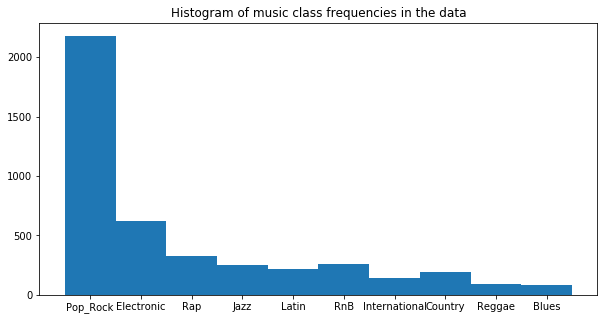

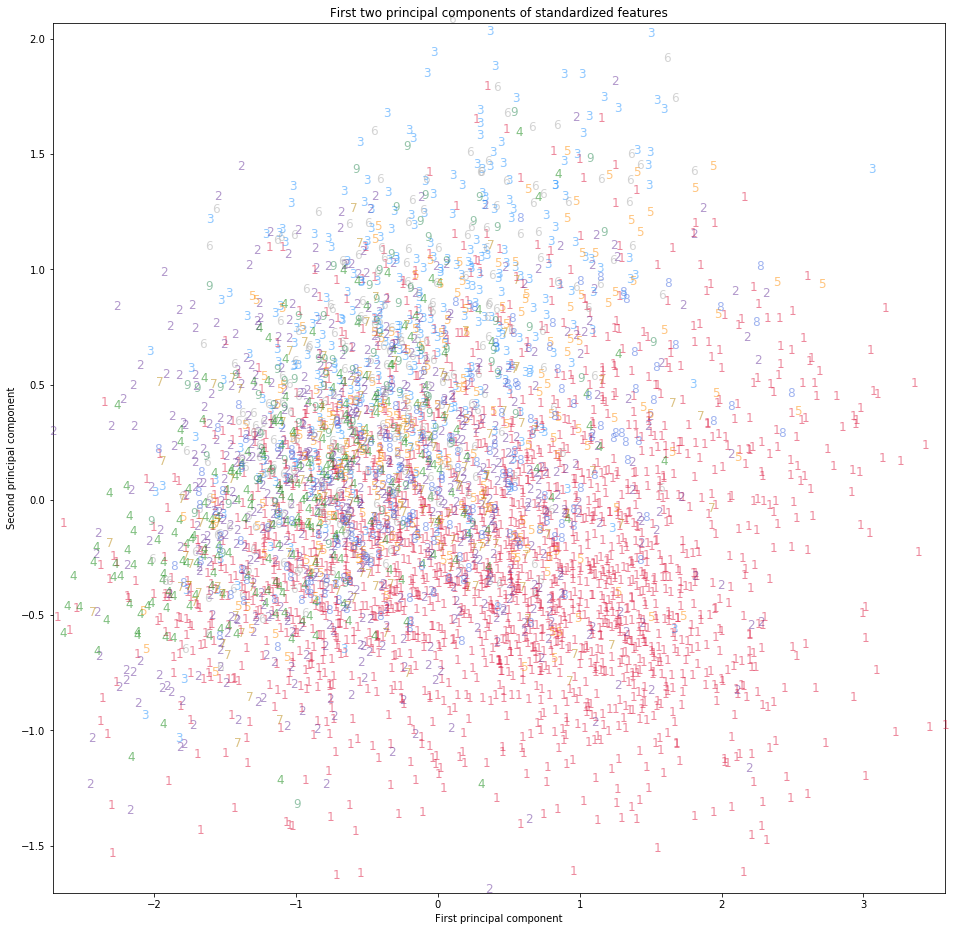

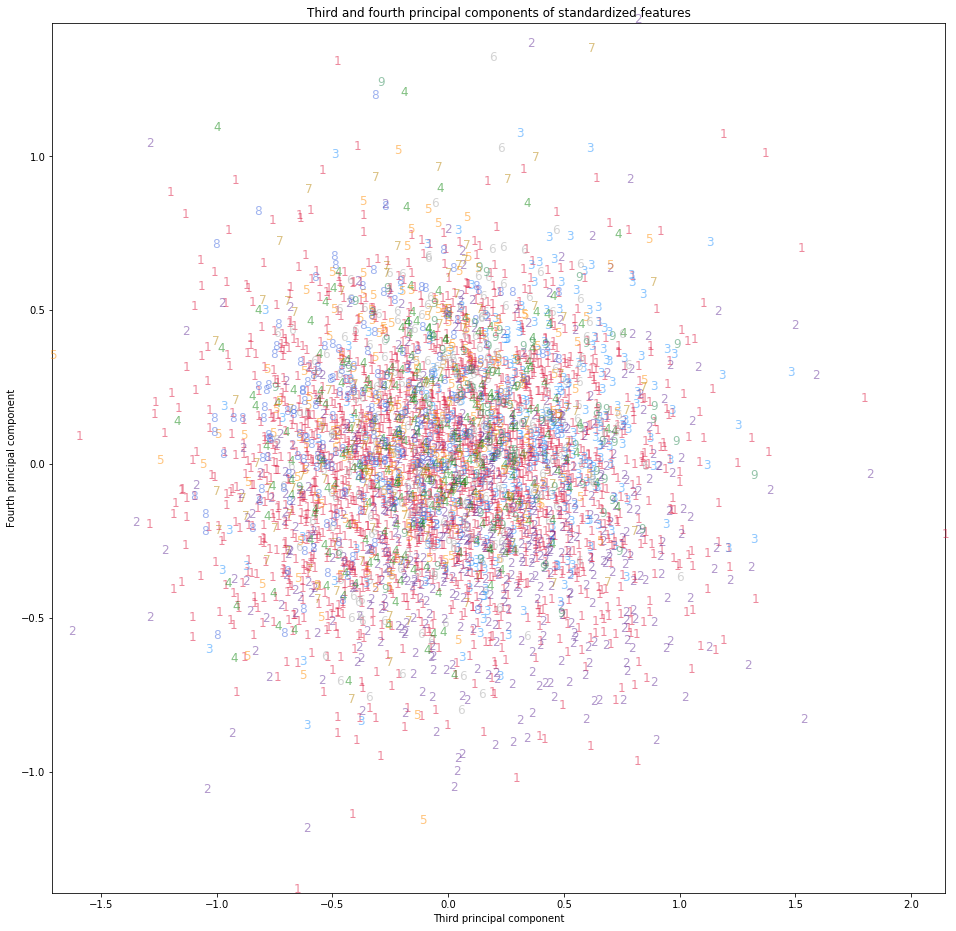

In [3]:
#Analysis of the input data
# ...
plt.rcParams['figure.figsize']=[10,5]


#print(y_train[y_train==10])
plt.hist(y_train, np.arange(1,12))
plt.xticks(np.arange(1,11)+0.5,['Pop_Rock','Electronic','Rap','Jazz','Latin','RnB','International','Country','Reggae','Blues'])
plt.title("Histogram of music class frequencies in the data")

# Symbols
def plotSym(ax,x,y,sym,col='black',fontsize=12):
    for i in range(x.shape[0]):
        ax.text(x[i],y[i],sym,color=col, fontsize=fontsize, ha='center',alpha=0.5)

def PCAscatter2D( X_2d,labels,xdimension,ydimension):
    # get x for d=2
    fig,ax = plt.subplots(1,1,figsize=(16,16))
    #X_2d = np.matmul(vec[:2,:],Z[:,:,None])[:,:,0]
    xlim = [np.min(X_2d[:,xdimension]), np.max(X_2d[:,xdimension])]
    ylim = [np.min(X_2d[:,ydimension]), np.max(X_2d[:,ydimension])]
    #xlim=[-6768, -6758]
    #ylim=[-3807.5 , -3805]
    plt.xlim(xlim)
    plt.ylim(ylim)
    colors = ['black', 'crimson', 'rebeccapurple', 'dodgerblue', 'g', 'darkorange', 'darkgrey', 'darkgoldenrod', 'royalblue', 'seagreen']
    useDigits = True
    if useDigits:
        for i,c in zip(range(10), colors):
            ind = labels == i
            x = X_2d[ind,xdimension]
            y = X_2d[ind,ydimension]
            plotSym(ax,x,y,str(i),c)
    else:
        for i,c in enumerate(colors):
            ind = labels == i
            x = X_2d[ind,0]
            y = X_2d[ind,1]
            print(c)
            ax.scatter(x,y)



PCAscatter2D(X_train_cleaned_stdnorm_PCA,y_train, 0,1)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title("First two principal components of standardized features")
plt.show()

#fig,ax = plt.subplots(2,2,figsize=(16,16))
PCAscatter2D(X_train_cleaned_stdnorm_PCA,y_train,2 ,3)
plt.xlabel('Third principal component')
plt.ylabel('Fourth principal component')
plt.title("Third and fourth principal components of standardized features")
plt.show()

In [4]:
# Grid search
from sklearn.model_selection import GridSearchCV

## 3. Methods and experiments

*- Explain your whole approach (you can include a block diagram showing the steps in your process).* 

*- What methods/algorithms, why were the methods chosen. *

*- What evaluation methodology (cross CV, etc.).*

The approach we followed in this project is shown in the next figure:

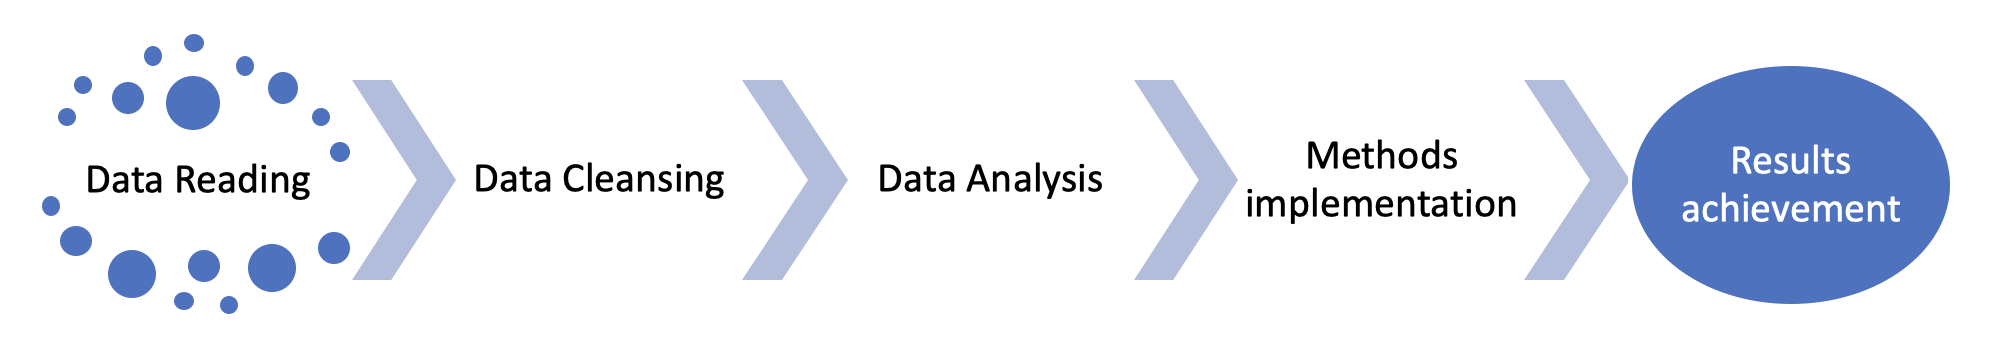


The methods we used to create the predictions are the following:
    - Logistic regression
    - Gradient boosting trees
    
The reasons behind choosing these methods are explained in the next lines:
- Logistic regression: this is a simple but powereful method used for multivariate classification tasks. 
- Gradient boosting trees: this method combines the outputs from weak learner and creates a strong learner which eventually improves the prediction power of the model. Boosting pays higher focus on examples which are mis-classiﬁed or have higher errors by preceding weak rules. 

The evaluation methodology we used was ...

In [45]:
# Trial with logistic regression
y_pred=np.zeros((np.size(X_test_cleaned,0) , 4 ))
grid_model[4]=GridSearchCV

#L2 Norm loss function - Multinomial

clf = LogisticRegression()

parameters = [{'solver': ['sag','saga', 'lbfgs','newton-cg'], #Liblinear not availvable with multinomial
            'multi_class':[ 'multinomial'],
            'max_iter':[1000],
            'penalty' : ['l2'],
            'random_state': [42] 
            }]

grid_model[0] = GridSearchCV( estimator = clf,
                            param_grid = parameters,
                            cv = 2,
                            n_jobs = -1,
                            scoring = 'accuracy')

grid_model[0] = grid_model[0].fit(X_train_cleaned_absnorm, y_train)

y_pred[:,0]=grid_model[0].predict(X_test_cleaned_absnorm) 
best_accuracy = grid_model[0].best_score_
best_parameters = grid_model[0].best_params_
print(best_accuracy)
print(best_parameters)


#L2 Norm loss function - Ovr (No multinomial)

clf = LogisticRegression()

parameters = [{'solver': ['sag','saga','liblinear','lbfgs','newton-cg'],
            'multi_class':[ 'ovr'],
            'max_iter':[1000],
            'penalty' : ['l2'],
            'random_state': [42] 
            }]

grid_model[1] = GridSearchCV( estimator = clf,
                            param_grid = parameters,
                            cv = 2,
                            n_jobs = -1,
                            scoring = 'accuracy')

grid_model[1] = grid_model[1].fit(X_train_cleaned_absnorm, y_train)

y_pred[:,1]=grid_model[1].predict(X_test_cleaned_absnorm) 
best_accuracy = grid_model[1].best_score_
best_parameters = grid_model[1].best_params_
print(best_accuracy)
print(best_parameters)


#L1 Norm loss function - Multinomial


parameters = [{'solver': ['saga'], #'newton-cg','lbfgs' and 'sag' only available for L2 norm, 'liblinear' doesn't support multinomial
            'multi_class':[ 'ovr', 'multinomial'],
            'max_iter':[2000],
            'penalty' : ['l1' ],
            'random_state': [42] 
            }]


grid_model[2] = GridSearchCV( estimator = clf,
                            param_grid = parameters,
                            cv = 2,
                            n_jobs = -1,
                            scoring = 'accuracy')

grid_model[2] = grid_model[2].fit(X_train_cleaned_absnorm, y_train)

y_pred[:,2]=grid_model[2].predict(X_test_cleaned_absnorm) 
best_accuracy = grid_model[2].best_score_
best_parameters = grid_model[2].best_params_
print(best_accuracy)
print(best_parameters)

#L1 Norm loss function - No multinomial


parameters = [{'solver': ['saga', 'liblinear'], #'newton-cg','lbfgs' and 'sag' only available for L2 norm
            'multi_class':[ 'ovr'],
            'max_iter':[2000],
            'penalty' : ['l1' ],
            'random_state': [42] 
            }]


grid_model[3] = GridSearchCV( estimator = clf,
                            param_grid = parameters,
                            cv = 2,
                            n_jobs = -1,
                            scoring = 'accuracy')

grid_model[3] = grid_model[3].fit(X_train_cleaned_absnorm, y_train)

y_pred[:,3]=grid_model[3].predict(X_test_cleaned_absnorm) 
best_accuracy = grid_model[3].best_score_
best_parameters = grid_model[3].best_params_
print(best_accuracy)
print(best_parameters)





# absfeatures, cv=2, scoring='accuracy', multi_class: 'ovr', solver:'saga' Accuracy 0.64695
# stdfeatures, cv=2, scoring='accuracy', multi_class: 'ovr', solver:'saga' Accuracy 0.64695
# rawfeatures, cv=2, scoring='accuracy', multi_class: 'multinomial', solver: 'newton-cg' Accuracy 0.55
# 
#
# Best score

#absfeatures
#0.6469509399358092
#{'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'random_state': 42, 'solver': 'saga'}

#absfeatures
#0.6419073819348923
#{'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}

#absfeatures
#0.6439706556625401
#{'max_iter': 2000, 'multi_class': 'multinomial', 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}
#0.6382393397524071
#{'max_iter': 2000, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}



0.6468026587210635
{'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'random_state': 42, 'solver': 'saga'}
0.6417602567041026
{'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 42, 'solver': 'sag'}
0.6447398578959431
{'max_iter': 2000, 'multi_class': 'multinomial', 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}
0.636947054778822
{'max_iter': 2000, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}


In [ ]:
#L1 Norm loss function - No multinomial


parameters = [{'solver': ['saga', 'liblinear'], #'newton-cg','lbfgs' and 'sag' only available for L2 norm
            'multi_class':[ 'ovr'],
            'max_iter':[2000],
            'penalty' : ['l1' ],
            'random_state': [42] 
            }]


grid_model = GridSearchCV( estimator = clf,
                            param_grid = parameters,
                            cv = 2,
                            n_jobs = -1,
                            scoring = 'accuracy')

grid_model = grid_model.fit(X_train_cleaned_absnorm, y_train)

y_pred[:,3]=grid_model.predict(X_test_cleaned_absnorm) 
best_accuracy = grid_model.best_score_
best_parameters = grid_model.best_params_
print(best_accuracy)
print(best_parameters)



In [54]:
#Write prediction for the test set here



In [5]:
#Trials with Gradient boosting trees

from sklearn.ensemble import GradientBoostingClassifier


clf = GradientBoostingClassifier()
#clf.score(X_test, y_test)                 

parameters = [{
               'n_estimators':[100,200,300,400,1000 ], #,20, 30,100, 200 
               'learning_rate':[ 0.5],# 1.0,
               'max_depth': [5], 
               'random_state': [42]             
               
            }]


grid_search = GridSearchCV(estimator = clf,
                           param_grid = parameters,
                           cv = 2,
                           n_jobs = -1,
                           scoring = 'accuracy',

)

grid_search = grid_search.fit(X_train, y_train)

# 
#
# Best score
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy)
print(best_parameters)




0.588950022925
{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100, 'random_state': 42}


AttributeError: module 'pandas' has no attribute 'writeCSV'

In [11]:
#Train with all the training data for Kaggle values and calculate Kaggle predictions



## 4. Results

*Summarize the results of the experiments without discussing their implications.*

*- Include both performance measures (accuracy and LogLoss).*

*- How does it perform on kaggle compared to the train data.*

*- Include a confusion matrix.*



In [92]:
#Confusion matrix
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn.metrics import confusion_matrix

model=LogisticRegression(max_iter=1000, multi_class='multinomial', penalty='l2', random_state=42, solver='saga')

X_train_split_train, X_train_split_test, y_train_split_train, y_train_split_test =train_test_split(X_train_cleaned_absnorm, y_train, test_size=0.35, random_state=31)

model.fit(X_train_split_train, y_train_split_train)


model_fulldata=LogisticRegression(max_iter=1000, multi_class='multinomial', penalty='l2', random_state=42, solver='saga')

model_fulldata.fit(X_train_cleaned_absnorm, y_train)





LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

([<matplotlib.axis.YTick at 0x7ff9e33cbc88>,
 <a list of 10 Text yticklabel objects>)

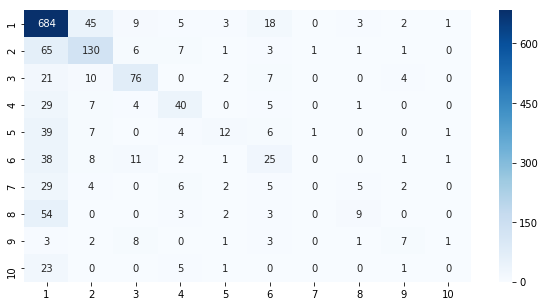

In [90]:
cm=confusion_matrix(y_train_split_test, model.predict(X_train_split_test) )
ax=sb.heatmap(cm, annot=True, fmt='g', cmap='Blues') 

plt.xticks(np.arange(1,11)-0.5,[1,2,3,4,5,6,7,8,9,10])
plt.yticks(np.arange(1,11)-0.5,[1,2,3,4,5,6,7,8,9,10])


In [95]:
#write the shit here

column_LikelihoodLabels=['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9','Class_10'] #'Sample_id',


df_logProb=pd.DataFrame(data=model_fulldata.predict_proba(X_test_cleaned_absnorm), 
                         index=np.arange(1, np.size(X_test_cleaned_absnorm,0)+1), 
                         columns=column_LikelihoodLabels)
df_logProb.to_csv(path_or_buf="y_Likelihood.csv", sep=',', columns=column_LikelihoodLabels, index_label='Sample_id')


column_PredictedLabels=['Sample_label'] #'Sample_id',

df_y_pred=pd.DataFrame(data=model_fulldata.predict(X_test_cleaned_absnorm) ,index=np.arange(1,np.size(X_test,0)+1), columns=column_PredictedLabels )#,index_label=np.arange(1,np.size(X_test,0)+1))
                  
df_y_pred.to_csv(path_or_buf="y_pred.csv", sep=',', columns=column_PredictedLabels, index_label='Sample_id')

## 5. Discussion/Conclusions

*Interpret and explain your results *

*- Discuss the relevance of the performance measures (accuracy and LogLoss) for
imbalanced multiclass datasets. *

*- How the results relate to the literature. *

*- Suggestions for future research/improvement. *

*- Did the study answer your questions? *



## 6. References

*List of all the references cited in the document*


(1) Machine Learning, Wikipedia, the free encyclopedia,
https://en.wikipedia.org/wiki/Machine_learning

(2) Alexander Jung, "Machine Learning: Basic Principles", 2018

(3) Gradient boosting, Analytics Vidhya,
https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/

## Appendix
*Any additional material needed to complete the report can be included here. For example, if you want to keep  additional source code, additional images or plots, mathematical derivations, etc. The content should be relevant to the report and should help explain or visualize something mentioned earlier. **You can remove the whole Appendix section if there is no need for it.** *